# Palmer Penguins Modeling

Import the Palmer Penguins dataset and print out the first few rows.

Suppose we want to predict `species` using the other variables in the dataset.

**Dummify** all variables that require this.

In [1]:
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression, LinearRegression
from palmerpenguins import load_penguins
from sklearn.compose import make_column_selector, ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, roc_auc_score, f1_score
df = load_penguins().dropna()
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007


In [4]:
ct = ColumnTransformer(
  [
    ("dummify", #Dummifying variables that need it
    OneHotEncoder(sparse_output = False, handle_unknown='ignore'), #If we haven't trained on a column, don't use for predicting on test validation
    make_column_selector(dtype_include=object)),
    ("standardize", 
    StandardScaler(), 
    make_column_selector(dtype_include=np.number))
  ],
  remainder = "passthrough"
)

In [5]:
X = df.drop(['species'],axis=1)
y = df['species']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

Let's use the other variables to predict `species`. Prepare your data and fit the following models on the entire dataset:

* Two kNN models (for different values of K)
* Two decision tree models (for different complexities of trees)

Compute the following, for each of your models, on test data. Keep in mind that you may need to stratify your creation of the training and test data.

* Confusion matrix
* Overall Accuracy
* Precision, Recall, AUC, and F1-score for each species

Create one ROC plot for the species of your choice.

# KNN with 20 neighbor

In [6]:
pipe = Pipeline(
      [("preprocessing", ct),
      ("model", KNeighborsClassifier(n_neighbors=20))]
)
pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_test)

# Calculate evaluation metrics
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average=None)
recall = recall_score(y_test, y_pred, average=None)
auc = roc_auc_score(y_test, pipe.predict_proba(X_test),multi_class='ovr')
f1 = f1_score(y_test, y_pred, average=None)

print("Confusion Matrix:\n", conf_matrix)
print("Overall Accuracy:", accuracy)
print("Precision per category:", precision)
print("Recall per category:", recall)
print("AUC:", auc)
print("F1-score per category:", f1)


Confusion Matrix:
 [[35  0  0]
 [ 2 15  0]
 [ 0  0 32]]
Overall Accuracy: 0.9761904761904762
Precision per category: [0.94594595 1.         1.        ]
Recall per category: [1.         0.88235294 1.        ]
AUC: 1.0
F1-score per category: [0.97222222 0.9375     1.        ]


# KNN with 100 neighbor

In [7]:
pipe = Pipeline(
      [("preprocessing", ct),
      ("model", KNeighborsClassifier(n_neighbors=100))]
)
pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_test)

# Calculate evaluation metrics
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average=None)
recall = recall_score(y_test, y_pred, average=None)
auc = roc_auc_score(y_test, pipe.predict_proba(X_test),multi_class='ovr')
f1 = f1_score(y_test, y_pred, average=None)

print("Confusion Matrix:\n", conf_matrix)
print("Overall Accuracy:", accuracy)
print("Precision per category:", precision)
print("Recall per category:", recall)
print("AUC:", auc)
print("F1-score per category:", f1)


Confusion Matrix:
 [[35  0  0]
 [11  6  0]
 [ 0  0 32]]
Overall Accuracy: 0.8690476190476191
Precision per category: [0.76086957 1.         1.        ]
Recall per category: [1.         0.35294118 1.        ]
AUC: 0.980817486909476
F1-score per category: [0.86419753 0.52173913 1.        ]


# Decision Tree

In [8]:
pipe = Pipeline(
      [("preprocessing", ct),
      ("model", DecisionTreeClassifier(max_depth=2))]
)
pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_test)

# Calculate evaluation metrics
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average=None)
recall = recall_score(y_test, y_pred, average=None)
auc = roc_auc_score(y_test, pipe.predict_proba(X_test),multi_class='ovr')
f1 = f1_score(y_test, y_pred, average=None)

print("Confusion Matrix:\n", conf_matrix)
print("Overall Accuracy:", accuracy)
print("Precision per category:", precision)
print("Recall per category:", recall)
print("AUC:", auc)
print("F1-score per category:", f1)


Confusion Matrix:
 [[31  3  1]
 [ 4 13  0]
 [ 0  1 31]]
Overall Accuracy: 0.8928571428571429
Precision per category: [0.88571429 0.76470588 0.96875   ]
Recall per category: [0.88571429 0.76470588 0.96875   ]
AUC: 0.9345793127506047
F1-score per category: [0.88571429 0.76470588 0.96875   ]


# Decision Tree

In [9]:
pipe = Pipeline(
      [("preprocessing", ct),
      ("model", DecisionTreeClassifier(max_depth=20))]
)
pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_test)

# Calculate evaluation metrics
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average=None)
recall = recall_score(y_test, y_pred, average=None)
auc = roc_auc_score(y_test, pipe.predict_proba(X_test),multi_class='ovr')
f1 = f1_score(y_test, y_pred, average=None)

print("Confusion Matrix:\n", conf_matrix)
print("Overall Accuracy:", accuracy)
print("Precision per category:", precision)
print("Recall per category:", recall)
print("AUC:", auc)
print("F1-score per category:", f1)


Confusion Matrix:
 [[33  1  1]
 [ 3 14  0]
 [ 0  0 32]]
Overall Accuracy: 0.9404761904761905
Precision per category: [0.91666667 0.93333333 0.96969697]
Recall per category: [0.94285714 0.82352941 1.        ]
AUC: 0.9451676537434722
F1-score per category: [0.92957746 0.875      0.98461538]


# ROC Curve for depth 2 decision tree predicting Adelie species

In [22]:
df['species'].unique()

array(['Adelie', 'Gentoo', 'Chinstrap'], dtype=object)

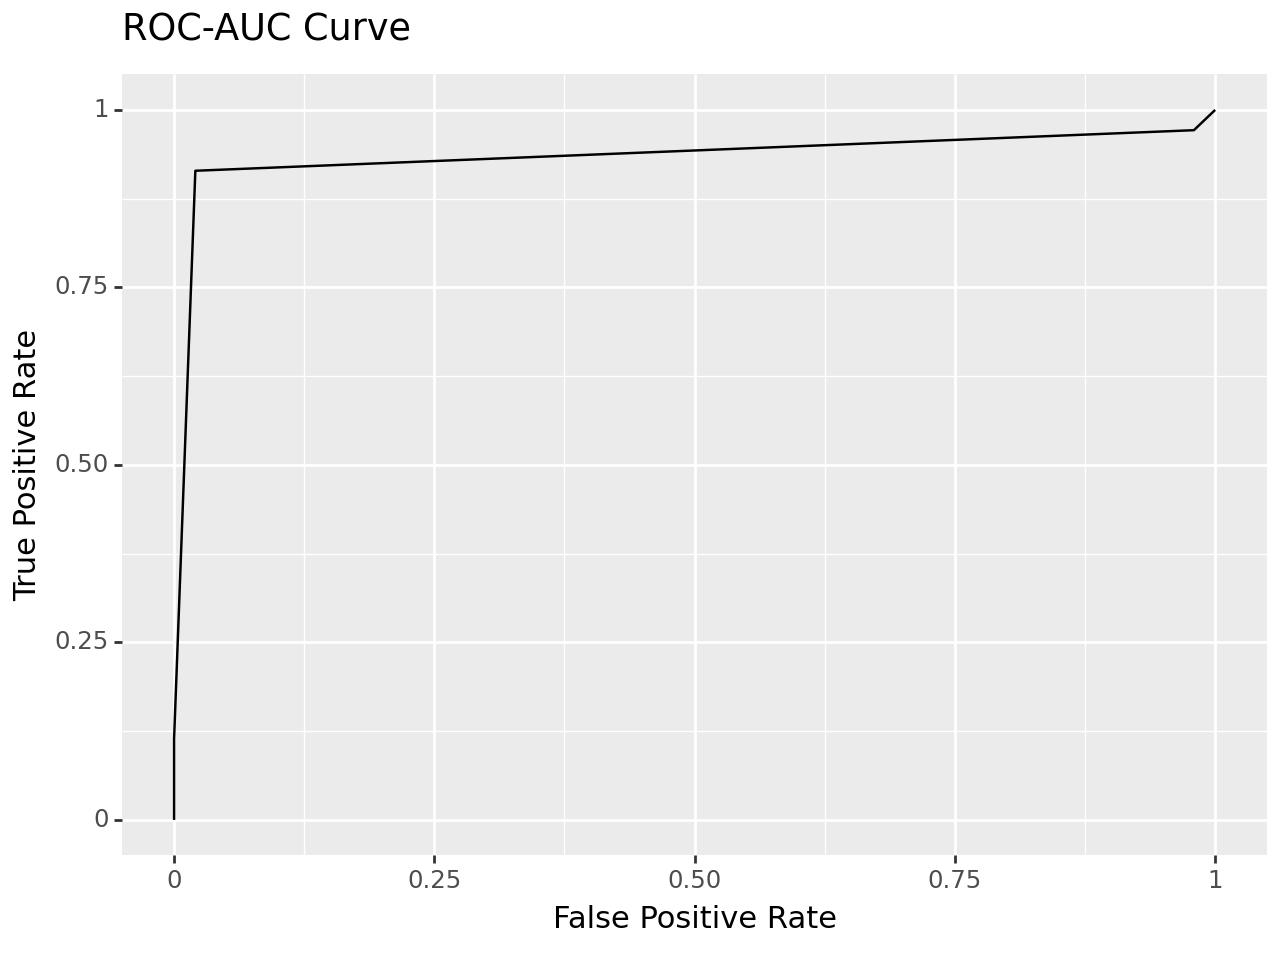

<Figure Size: (640 x 480)>

In [30]:
y = list(map(lambda x: 1 if x else 0,list(df['species'] == 'Adelie')))
X = df.drop(['species'],axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
pipe = Pipeline(
      [("preprocessing", ct),
      ("model", DecisionTreeClassifier(max_depth=2))]
)
pipe.fit(X_train, y_train)

y_pred = pipe.predict_proba(X_test) #y_pred[:,1]

from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred[:,1],drop_intermediate=False) #This takes the first category

from plotnine import ggplot,aes,geom_point,geom_smooth,labs,geom_line,scale_color_manual

(ggplot(pd.DataFrame({"tpr":tpr,"fpr":fpr}), aes(x='fpr', y='tpr'))
    + labs(x='False Positive Rate', y='True Positive Rate', title='ROC-AUC Curve')
    + geom_line()
)
